In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

# Importing python package pandas datareader to import data from yahoo
from pandas_datareader import data as pdr
import yfinance as yf

import statsmodels.api as sm
from statsmodels import regression

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


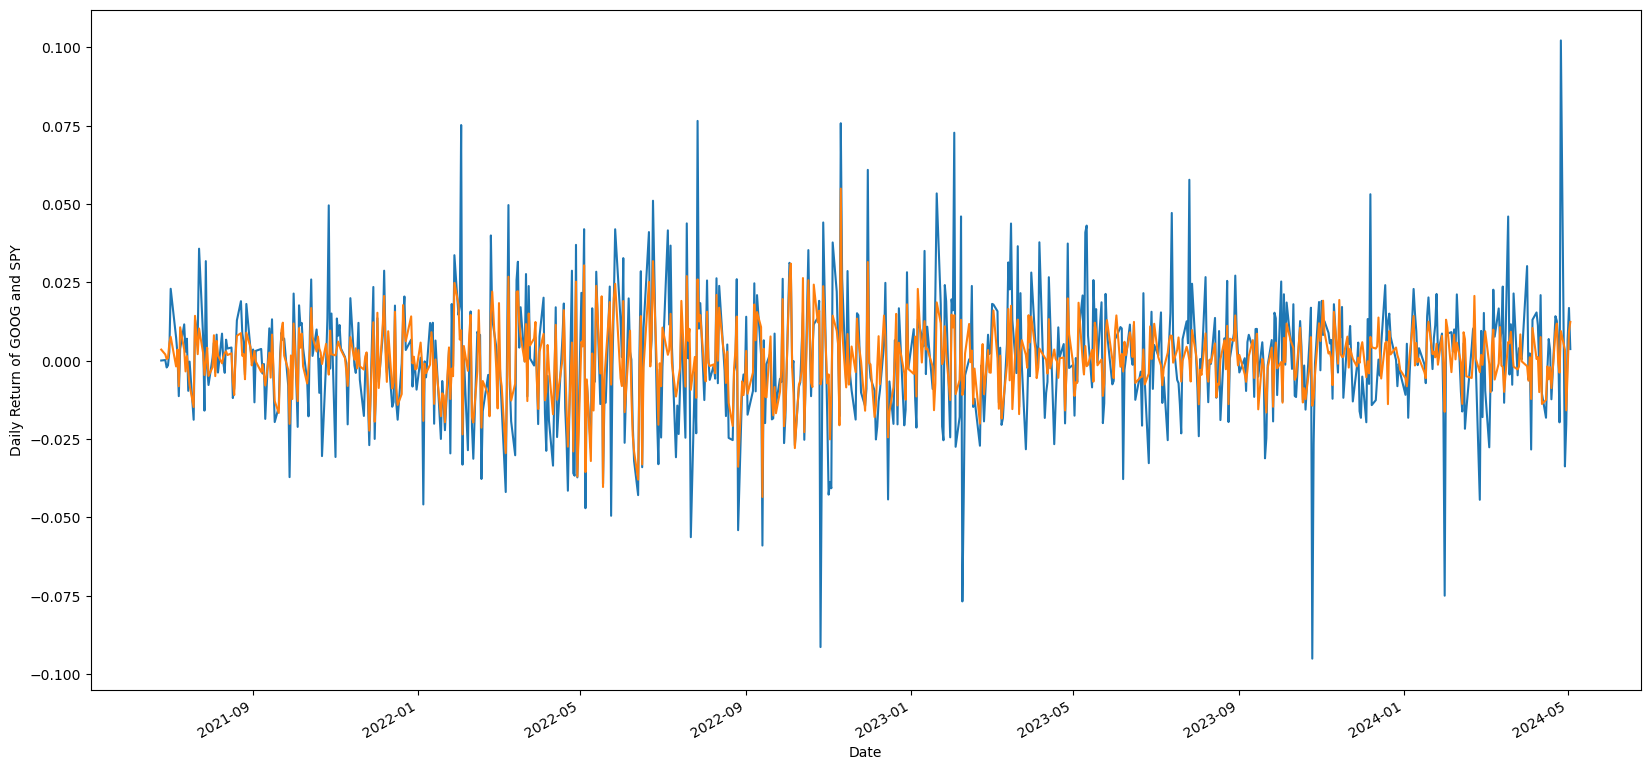

In [7]:

df1 =  yf.download('GOOGL', period = "720d", interval = "1d")
df2 =  yf.download('SPY', period = "720d", interval = "1d")

# We have to take the percent changes to get to returns hence we will use .pct_change()
# We do not want the first (0th) element because it is NAN
return_goog = df1.Close.pct_change()[1:]
return_spy = df2.Close.pct_change()[1:]

# We will plot the returns of Google and S&P500 against each other
plt.figure(figsize=(20,10))
return_goog.plot()
return_spy.plot()
plt.ylabel("Daily Return of GOOG and SPY")
plt.show()

In [16]:
def alphbeta(ticker1, ticker2 = 'SPY'):
    yf.pdr_override()
    df1 =  yf.download(ticker1, period = "720d", interval = "1d")
    df2 =  yf.download('SPY', period = "720d", interval = "1d")
    return_tick = df1.Close.pct_change()[1:]
    return_spy = df2.Close.pct_change()[1:]
    X = return_spy.values
    Y = return_tick.values

    def linreg(x,y):
        x = sm.add_constant(x)
        model = regression.linear_model.OLS(y,x).fit()

    # We are removing the constant
        x = x[:, 1]
        return model.params[0], model.params[1]

    alpha, beta = linreg(X,Y)
    print('alpha: ' + str(alpha))
    print('beta: ' + str(beta))

alphbeta('NVDA')
    

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
alpha: 0.002008787792508337
beta: 2.1973319994305265


In [13]:
# # Regression model
# X = return_spy.values
# Y = return_goog.values

# def linreg(x,y):
#     x = sm.add_constant(x)
#     model = regression.linear_model.OLS(y,x).fit()

#     # We are removing the constant
#     x = x[:, 1]
#     return model.params[0], model.params[1]

# alpha, beta = linreg(X,Y)
# print('alpha: ' + str(alpha))
# print('beta: ' + str(beta))

ValueError: endog and exog matrices are different sizes